#Библиотеки

In [63]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np
import os
import pywt
import pandas as pd
import statistics
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.signal import argrelmax, argrelmin, find_peaks
from scipy import signal, loadtxt, optimize

#Данные

In [64]:
data = pd.read_csv('/content/gyro5.txt', sep=" ", header= None, skiprows=[0])
data.columns = ['t', 'x', 'y', 'z', '-']
data['t'] = (data['t']-data['t'][0])*(10**(-9)) #Обнуление времени и его перевод в обычные секунды
print(data.head())

          t         x        y         z   -
0  0.000000 -0.059124  0.02086 -0.036964 NaN
1  0.020237 -0.039124 -0.07414 -0.034964 NaN
2  0.040474  0.004875  0.01886 -0.026964 NaN
3  0.060710 -0.015124  0.05286 -0.016964 NaN
4  0.080947 -0.017124  0.07386 -0.022964 NaN


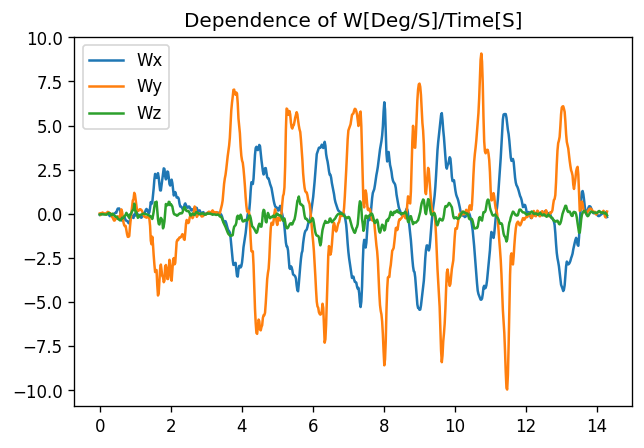

In [65]:
figure(figsize=(6, 4), dpi=120)
plt.title('Dependence of W[Deg/S]/Time[S]')
plt.plot(data['t'], data['x'], label = 'Wx')
plt.plot(data['t'], data['y'], label = 'Wy')
plt.plot(data['t'], data['z'], label = 'Wz')
plt.legend()
plt.show()

#Перевод в углы

In [66]:
def angle(array, coord):
  a = []
  an = 0 #начальный угол
  t_d = (array['t'][len(array)-1]-array['t'][0])/len(array)
  for i in range(0, len(array)):
    an = an+array[coord][i]*t_d
    a.append(an)

  return np.array(a)

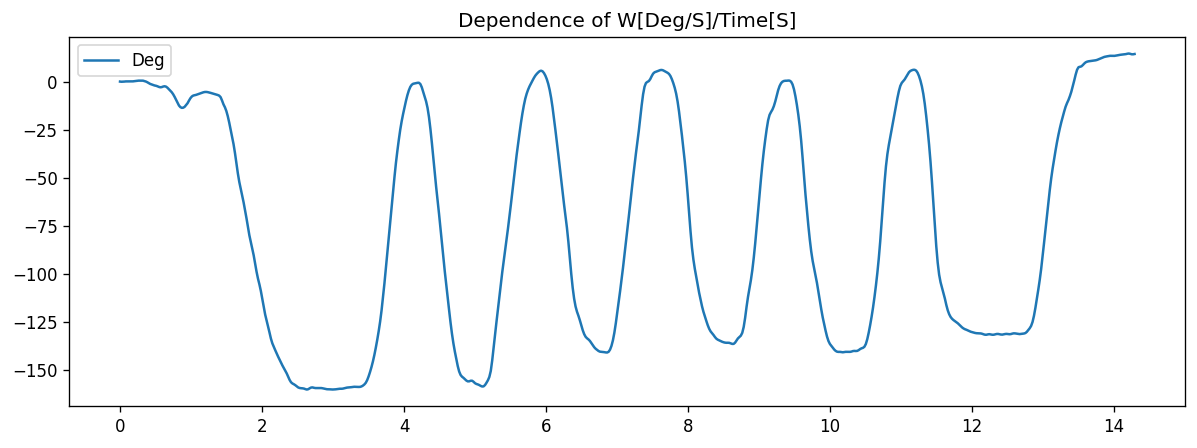

In [67]:
figure(figsize=(12, 4), dpi=120)
plt.title('Dependence of W[Deg/S]/Time[S]')
plt.plot(data['t'], angle(data,'y')*180/math.pi, label = 'Deg')# Домножение на 180 и деление на pi переводит радианы в градусы
plt.legend()
plt.show()

#Фильтрация

In [68]:
def filtration(smooth, array, coord):
  degrees = angle(array,coord)*180/math.pi
  return lowess(degrees, array['t'], is_sorted=True, frac = smooth, it=0)

In [69]:
def minmax(array):

  maxTemp = argrelmax(array, order = 15)
  minTemp = argrelmin(array, order=15)

  mines = []
  maxes = []

  for maxi in maxTemp[0]:
    maxes.append(maxi)

  for mini in minTemp[0]:
    mines.append(mini)

  return maxes, mines

In [70]:
max, min = minmax(filtration(0.06, data, 'y'))
deg = angle(data,'y')*180/math.pi

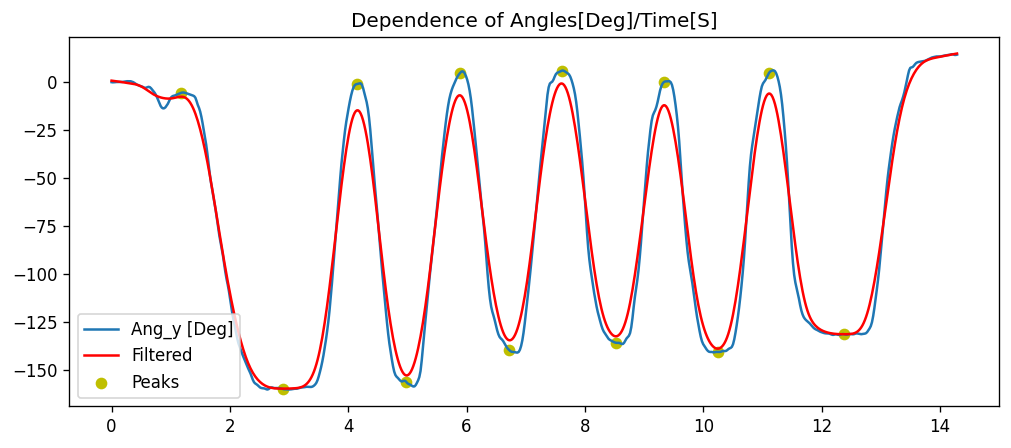

In [71]:
figure(figsize=(10, 4), dpi=120)
plt.title('Dependence of Angles[Deg]/Time[S]')
plt.plot(data['t'], deg, label = 'Ang_y [Deg]')
plt.plot(filtration(0.06, data,'y')[:,0], filtration(0.06, data,'y')[:,1], label = 'Filtered', color = 'r')
plt.scatter(data['t'][min], np.array(deg)[min], color = 'y', label = 'Peaks')
plt.scatter(data['t'][max], np.array(deg)[max], color = 'y')
plt.legend()

#Подсчет количества движений

In [72]:
def calculate_movings(array, coord):
  maxes, mines = minmax(filtration(0.06, data, coord))
  return int((len(maxes) + len(mines)-2)/2)

In [73]:
calculate_movings(data, 'y')

5